<h1>Key Features:</h1>
<ul>
<li><p><strong>General Information:</strong>  </p>
<ul>
<li><code>id</code>: Unique identifier for each property.  </li>
<li><code>date</code>: Date of sale.  </li></ul></li>
<li><p><strong>Price Details:</strong>  </p>
<ul>
<li><code>price</code>: Sale price of the house.  </li></ul></li>
<li><p><strong>Property Features:</strong>  </p>
<ul>
<li><code>bedrooms</code>: Number of bedrooms.  </li>
<li><code>bathrooms</code>: Number of bathrooms (including partials as fractions).  </li>
<li><code>sqft_living</code>: Living space area in square feet.  </li>
<li><code>sqft_lot</code>: Lot size in square feet.  </li>
<li><code>floors</code>: Number of floors.  </li>
<li><code>waterfront</code>: Whether the property has a waterfront view.  </li>
<li><code>view</code>: Quality of the view rating.  </li>
<li><code>condition</code>: Overall condition of the house.  </li>
<li><code>grade</code>: Grade of construction and design (scale of 1–13).  </li></ul></li>
<li><p><strong>Additional Metrics:</strong>  </p>
<ul>
<li><code>sqft_above</code>: Square footage of the property above ground.  </li>
<li><code>sqft_basement</code>: Basement area in square feet.  </li>
<li><code>yr_built</code>: Year the property was built.  </li>
<li><code>yr_renovated</code>: Year of last renovation.  </li></ul></li>
<li><p><strong>Location Coordinates:</strong>  </p>
<ul>
<li><code>zipcode</code>: ZIP code of the property.  </li>
<li><code>lat</code> and <code>long</code>: Latitude and longitude coordinates.  </li></ul></li>
<li><p><strong>Neighbor Comparisons:</strong>  </p>
<ul>
<li><code>sqft_living15</code>: Average living space of 15 nearest properties.  </li>
<li><code>sqft_lot15</code>: Average lot size of 15 nearest properties.  </li></ul></li>
</ul>

<a href="https://www.kaggle.com/datasets/alyelbadry/house-pricing-dataset/data">source page</a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.express as px


warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.float_format = "{:.2f}".format


# EDA-exploratory Data Analysis

## Dataset Reading and First Look

In [2]:
data = pd.read_csv("house_prices.csv")
data.columns = list(map(lambda x: x.lower(), data.columns))
data.columns = list(map(lambda x: x.strip(), data.columns))
data = data.drop("id", axis = 1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.00,3,1.00,1180,5650,1.00,N,0,Average,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,20141209T000000,538000.00,3,2.25,2570,7242,2.00,N,0,Average,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,20150225T000000,180000.00,2,1.00,770,10000,1.00,N,0,Average,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,20141209T000000,604000.00,4,3.00,1960,5000,1.00,N,0,Very Good,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,20150218T000000,510000.00,3,2.00,1680,8080,1.00,N,0,Average,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## Data Types of Features

In [3]:
data.dtypes.to_frame(name = "data types")

,data types
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,object
view,int64
condition,object


In [4]:
data["date"] = pd.to_datetime(data["date"])

## Summary Table of Numeric Variables

In [5]:
summary_cont_df = data.select_dtypes(include="number").describe()

def transform(data):
    for key, value in data.items():
        data[key] = list(map(lambda x: f"{x:,.2f}", value))
    
    return data

summary_cont_df = transform(summary_cont_df).reset_index(names = "measures")
fig = go.Figure(data=[go.Table(
    header=dict(values=summary_cont_df.columns.tolist(),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=summary_cont_df.values.T,
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title = "summary table of continuous variables")
fig.show()

##  Summary Table of Categorical Variables


In [6]:
summary_cat_df = data.select_dtypes(include="object").describe().reset_index(names="measures")

fig = go.Figure(data=[go.Table(
    header=dict(values=summary_cat_df.columns.tolist(),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=summary_cat_df.values.T,
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title = "summary table of categorical variables")
fig.show()


In [7]:
data["year"] = data.date.dt.year
data["month"] = data.date.dt.month
data["day"] = data.date.dt.day

## Average price by the Sale Years

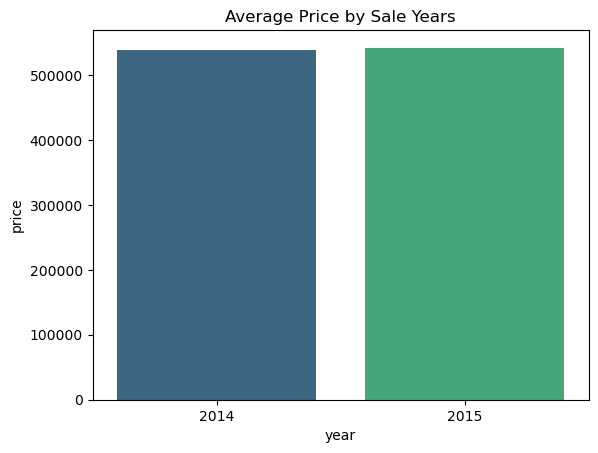

In [8]:
avg_price_by_year = data.groupby(by = "year", as_index=False)["price"].mean()

sns.barplot(
    x = avg_price_by_year["year"],  
    y = avg_price_by_year["price"], 
    palette="viridis",
        )

plt.title("Average Price by Sale Years");

## Distribution of Houses by Conditions

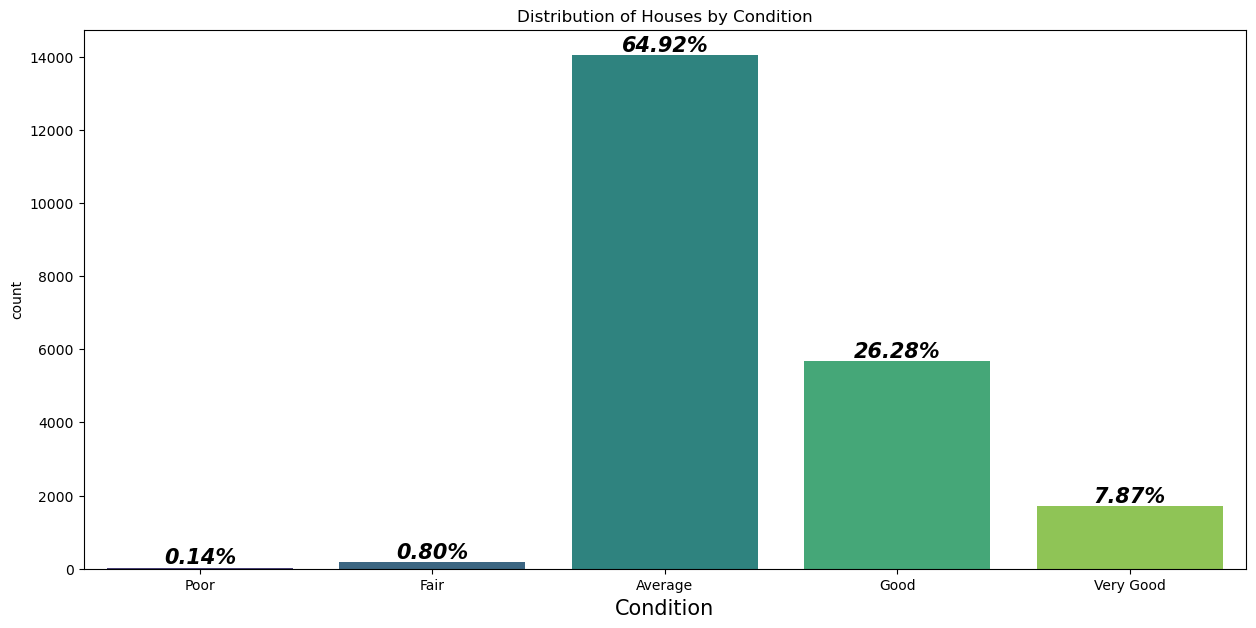

In [9]:
txt_table = data.condition.value_counts().to_frame().reset_index().assign(percent = data.condition.value_counts(normalize=True).values.reshape(-1, 1))

plt.figure(figsize=(15, 7))
g = sns.countplot(
    data = data,
    x = "condition",
    order = ["Poor", "Fair", "Average", "Good", "Very Good"],
    palette="viridis"
)
for item in txt_table.values:
    plt.text(
        x = item[0],
        y = item[1],
        s = f"{item[2] * 100:,.2f}%",
        fontdict=dict(size = 15, style = "oblique", weight = "bold"),
        ha = "center",
        va = "bottom" 
    )

g.set_title("Distribution of Houses by Condition")
plt.xlabel("Condition", fontdict=dict(size = 15));


## Relationships Between Continuous Variables

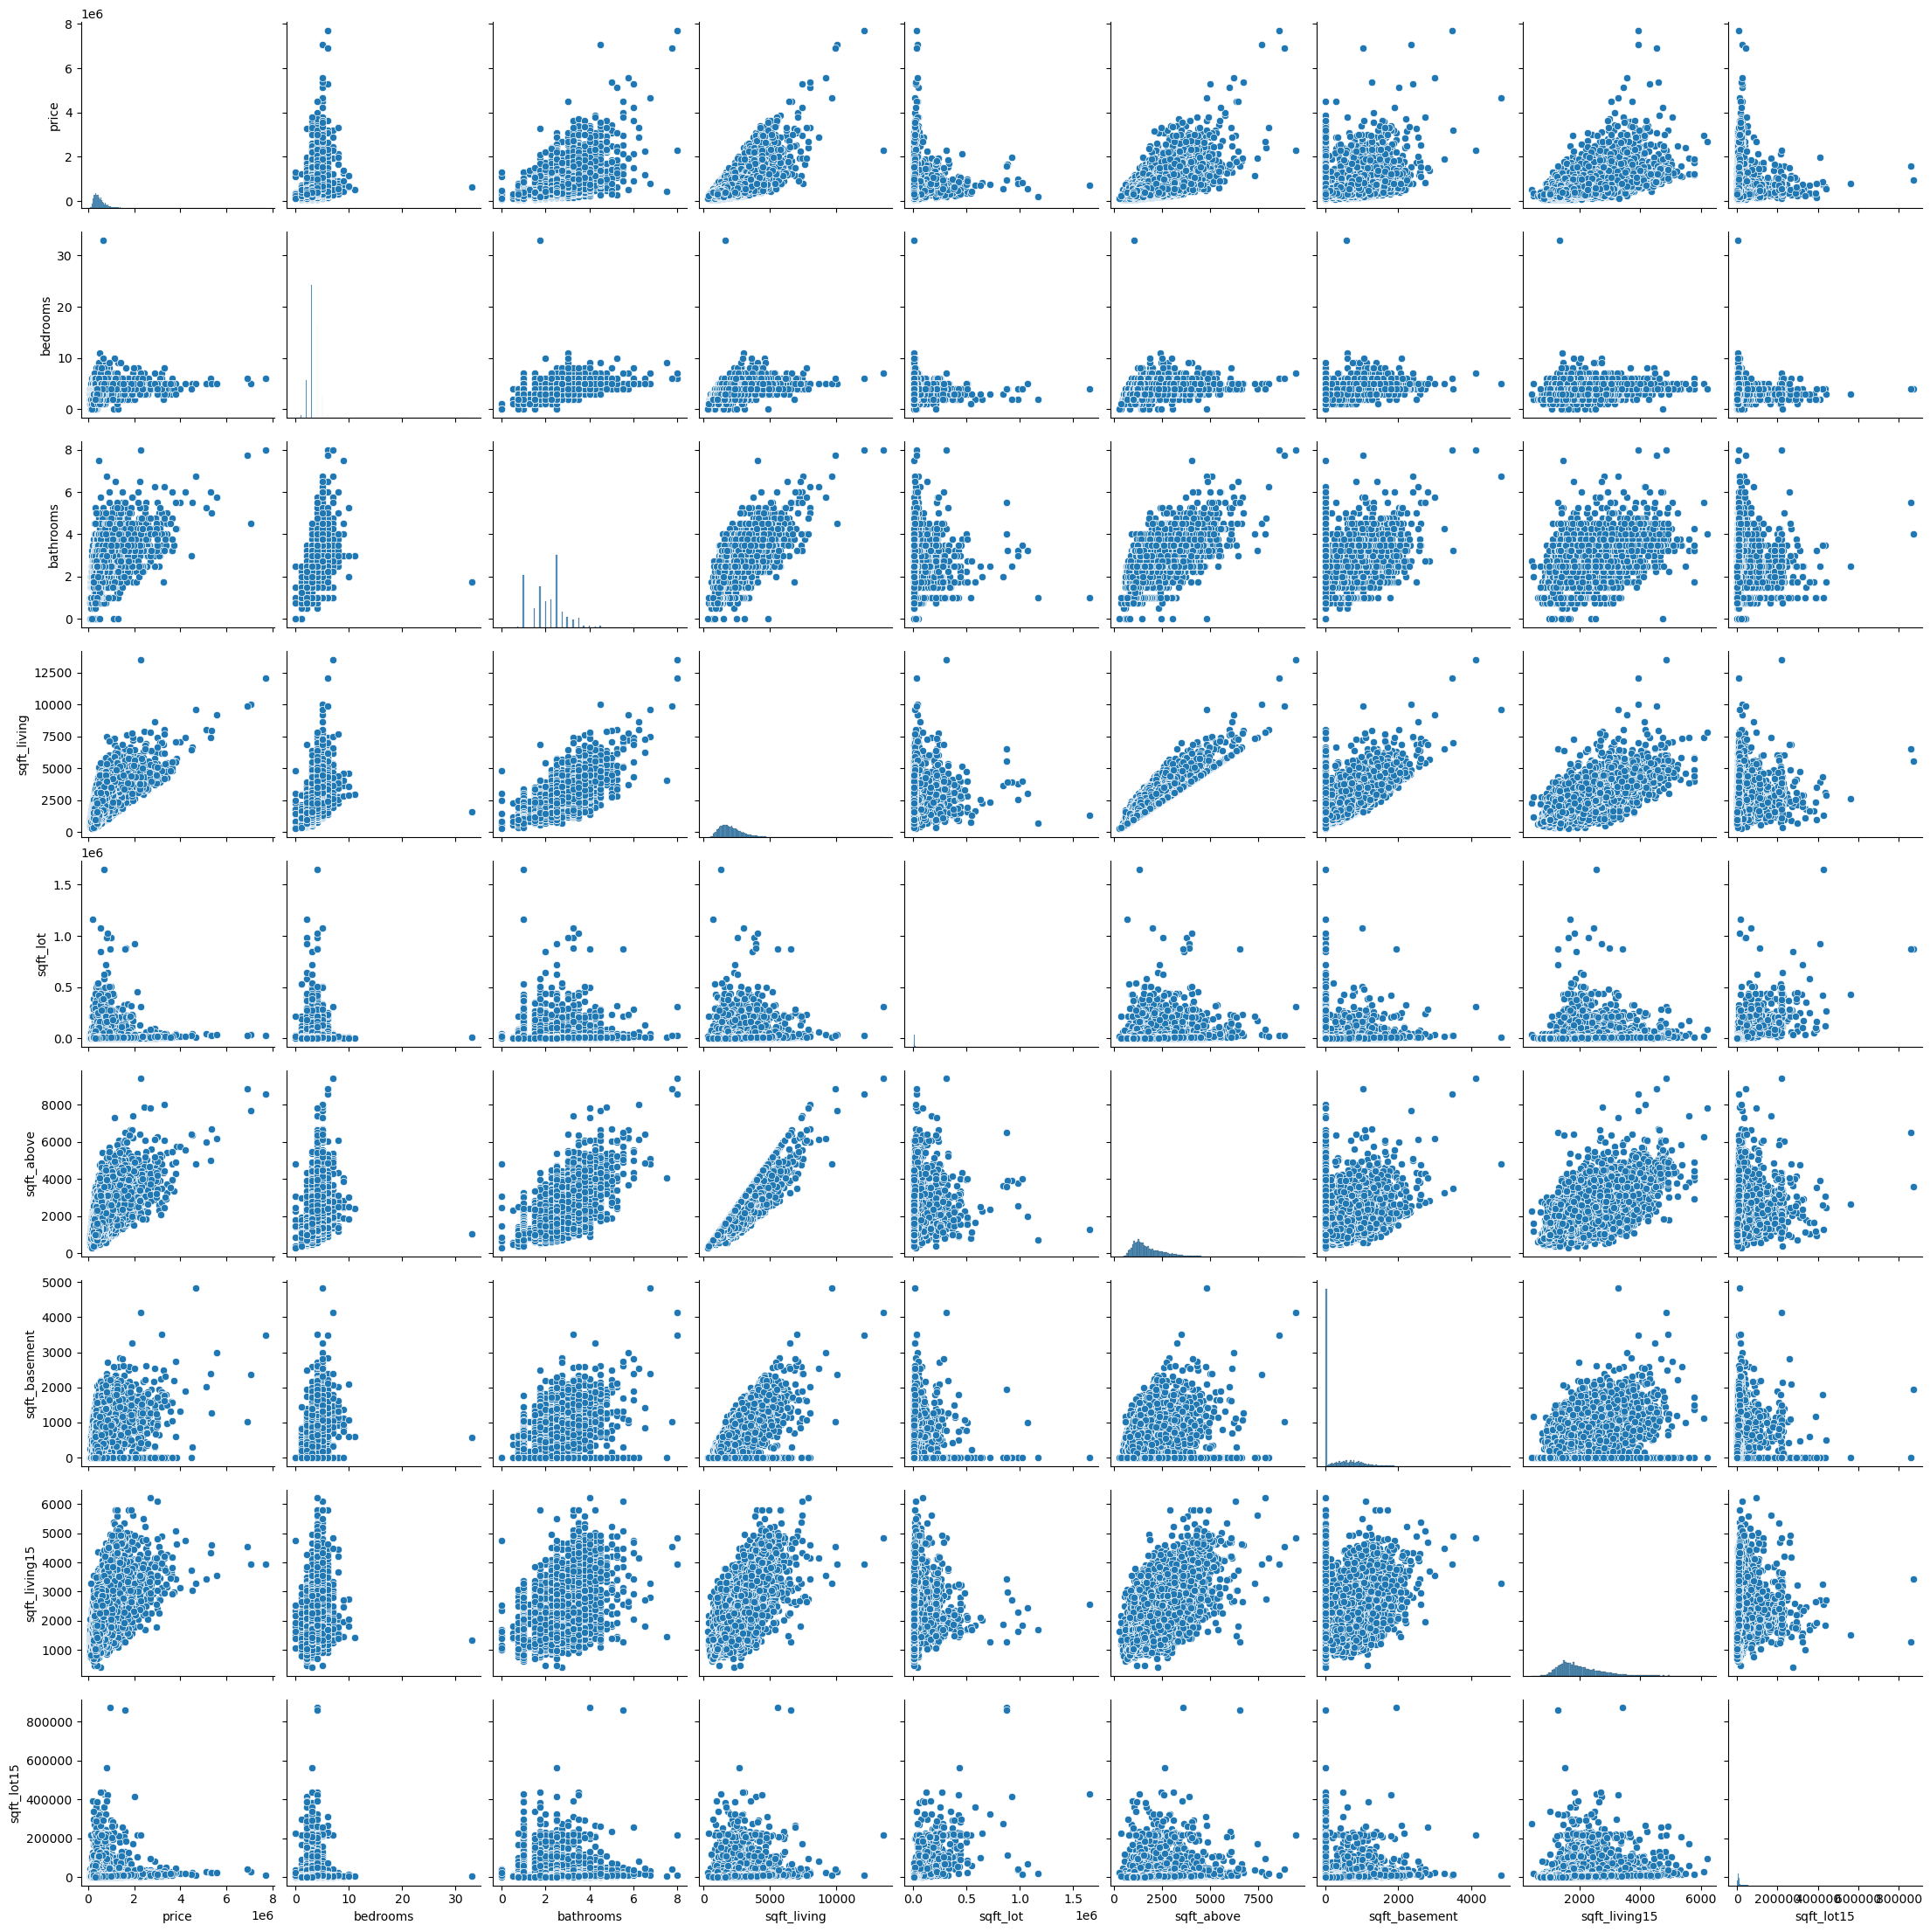

In [11]:
sns.pairplot(
    data = data.drop(["grade", "view", "floors", "waterfront", "condition", 
                      "yr_built", "yr_renovated", "lat", "long", 
                      "zipcode", "year", "month", "day"], axis = 1),
    diag_kind="hist",
    corner = False,
    palette="viridis"

);

## Heatmap of Features

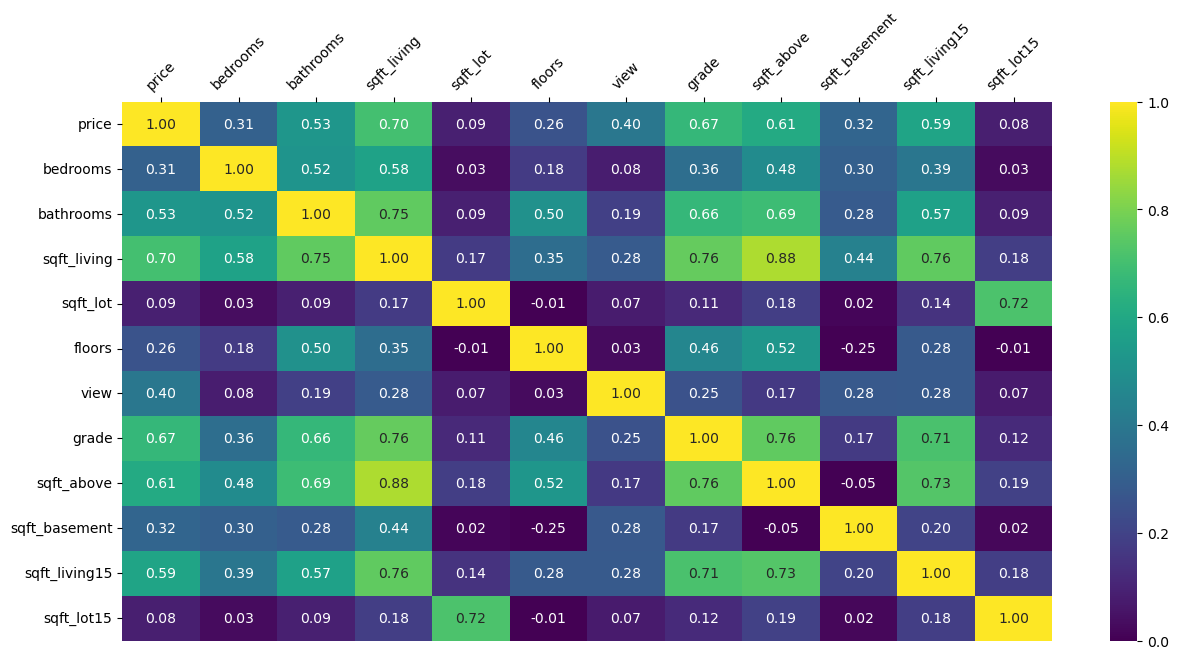

In [ ]:
plt.figure(figsize = (15, 7))
corr_matris = data.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', "year", "month", "day"], axis = 1).select_dtypes(include="number").corr()
ax = sns.heatmap(
    corr_matris,
    vmin = 0,
    vmax = 1,
    annot=True,
    fmt=".2f",
    cmap="viridis"
    
    )
ax.xaxis.tick_top()
plt.xticks(rotation = 45);

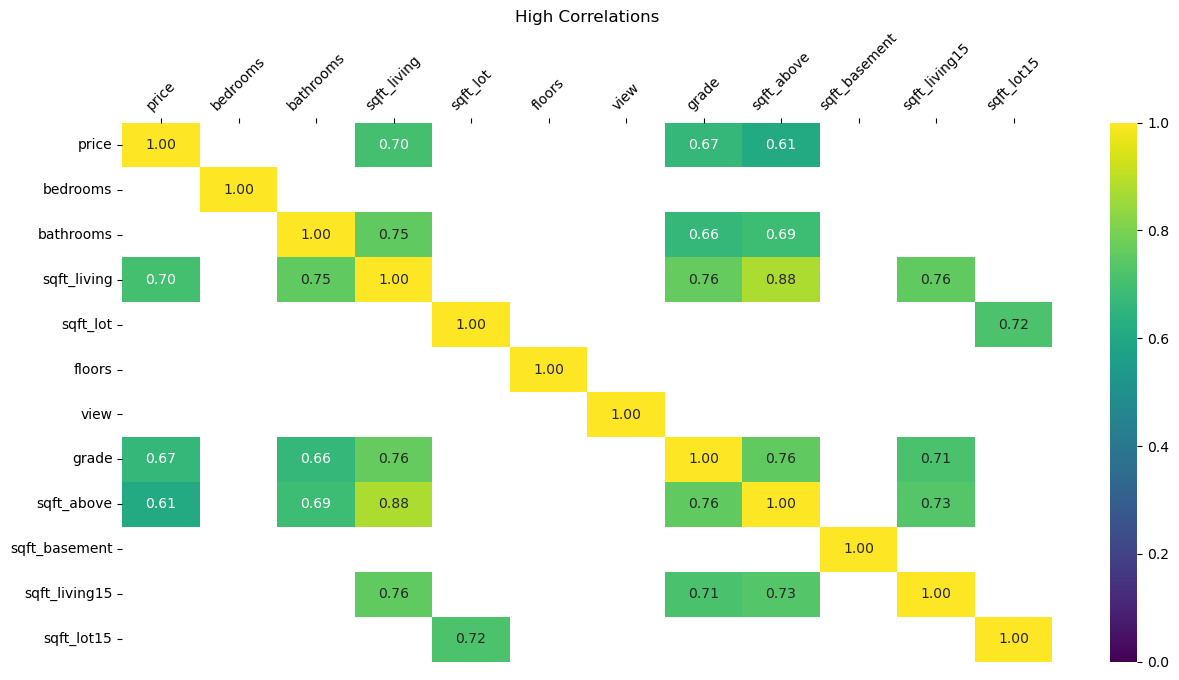

In [13]:
plt.figure(figsize = (15, 7))
corr_matris = data.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', "year", "month", "day"], axis = 1).select_dtypes(include="number").corr()
ax = sns.heatmap(
    corr_matris,
    vmin = 0,
    vmax = 1,
    annot=True,
    fmt=".2f",
    mask=((corr_matris < 0.60) & (corr_matris > -0.60)).values,
    cmap="viridis"
    )
ax.xaxis.tick_top()
plt.xticks(rotation = 45)
plt.title("High Correlations");


## Avg Price by Built Years

In [14]:
avg_price_by_yr_built = data.groupby(by = "yr_built", as_index=False)["price"].agg(avg_price = "mean", std_price = "std")
fig = px.line(
    avg_price_by_yr_built, 
    x="yr_built", 
    y="avg_price", 
    title="Avg  Price Over Years",
    markers = True
    
    )
fig.update_layout(
    xaxis_title = "Built Year",
    yaxis_title = "Average Price"
)
fig.show()

Text(0, 0.5, 'Avarage Price')

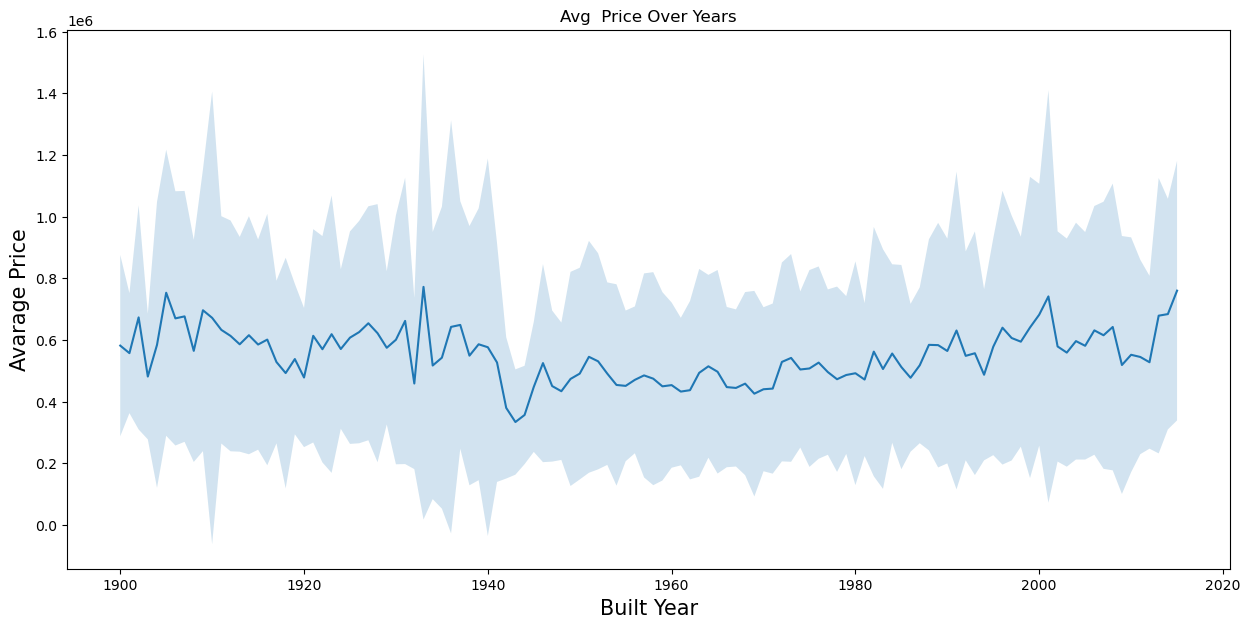

In [15]:
plt.figure(figsize = (15, 7))
sns.lineplot(x = avg_price_by_yr_built["yr_built"], y = avg_price_by_yr_built["avg_price"])
plt.fill_between(
    avg_price_by_yr_built["yr_built"], 
    y1=avg_price_by_yr_built["avg_price"] - avg_price_by_yr_built["std_price"], 
    y2=avg_price_by_yr_built["avg_price"] + avg_price_by_yr_built["std_price"],
    alpha = 0.2,
    )

plt.title("Avg  Price Over Years")
plt.xlabel("Built Year", size = 15)
plt.ylabel("Avarage Price", size = 15)

# Preparations for Model Training

In [16]:
df = data.drop(["date", "month", "day", "lat", "long", "zipcode"], axis = 1)
df = df.rename({"year": "sale_year"}, axis = 1)

## Encoding Ordinal and Nominal Variables 

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

cat_ord_feature = ["condition"]
condition_order = [["Poor", "Fair", "Average", "Good", "Very Good"]]

ord_encoder = OrdinalEncoder(categories=condition_order)
df["condition"] = ord_encoder.fit_transform(df[cat_ord_feature])


binary_feature = ["waterfront"]

label_encoder = LabelEncoder() 
df["waterfront"] = label_encoder.fit_transform(df[binary_feature])


## Train-Test Splitting

In [34]:
from sklearn.model_selection import train_test_split

x = df.drop("price", axis = 1)
y = df["price"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=1)

pd.DataFrame(data = [item.shape for item in [x_train, x_test, y_train, y_test]], columns = ["sample", "feature"], index = ["x_train", "x_test", "y_train", "y_test"]).fillna(0).astype("int")

,sample,feature
x_train,17290,16
x_test,4323,16
y_train,17290,0
y_test,4323,0


## Standardization and Training Pipeline

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor



In [78]:
train_pipe = Pipeline(
    [
        ("std_scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)
train_pipe

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('model', LinearRegression())])

In [126]:
models_params = [
    {
        "model": [KNeighborsRegressor()],
        "model__n_neighbors":[10, 15, 20, 30, 50],
        "model__weights": ['uniform', 'distance'],
        "model__algorithm": ['brute', 'ball_tree', 'kd_tree'],
        "model__leaf_size": [10, 30, 50],
        "model__p":[1, 2]
    },

    {
        "model": [RandomForestRegressor()],
        "model__n_estimators": [200, 400, 600, 1000],
        "model__max_depth": [10, 20, 30],
        "model__max_features": [3, 5, 8, 10],
        
    },

    {
      "model": [LGBMRegressor()],
      "model__num_leaves": [50, 100, 150, 200],
      "model__max_depth" : [10, 20, 30],
      "model__n_estimators" : [200, 400, 600, 800],
      "model__subsample": [0.6, 0.8, 0.90]  
    }
    
]

In [131]:
def model_selections(x_train, y_train, param_set={}, cv = 5):


    grid = RandomizedSearchCV(
        estimator=train_pipe,
        param_distributions=param_set,
        scoring="r2",
        n_jobs= -1,
        cv = cv,
        refit=True,
        n_iter=50,
        verbose=2
    )
    return grid.fit(x_train, y_train)

result_model = model_selections(x_train, y_train, models_params, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [142]:
result_model.best_score_

0.7517764343797676

In [145]:
result_model.best_params_

{'model__n_estimators': 400,
 'model__max_features': 8,
 'model__max_depth': 20,
 'model': RandomForestRegressor()}

In [146]:
result_model.score(x_test, y_test)

0.7683967636897588